# Machine Learning: Lab 3 – Credit Card Fraud Detection and ANNs

# Importing Data:

1. Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 20%
rows of the dataframe (these must be the same for all the students). The remaining rows will be the 
training + validation set, with training : validation ratio of 80% : 20%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
creditcard_df = pd.read_csv("creditcard.csv")
creditcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
creditcard_df_shuffled = creditcard_df.sample(frac=1,random_state=42) 
creditcard_df_shuffled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [4]:
shape = (20*creditcard_df_shuffled.shape[0])//100
#print(shape)
testing_set = creditcard_df_shuffled.tail(shape)
testing_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67,44.0,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,...,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
32212,36690.0,-0.584534,0.516797,2.690273,1.666086,-0.497783,0.712059,0.238978,0.218306,0.836184,...,-0.400695,-0.460325,-0.017198,0.375110,-0.138729,-0.416343,0.268763,-0.034817,29.45,0
139298,83093.0,1.003421,0.193060,1.620985,2.690939,-0.543496,0.913447,-0.657412,0.385481,-0.010028,...,0.001964,0.243906,0.133628,0.100668,0.123590,-0.006763,0.079287,0.034553,6.47,0
270149,163938.0,-0.236620,1.154627,-0.528508,-0.853377,0.848756,-0.221496,0.622917,0.336601,-0.319941,...,-0.257840,-0.676206,0.058260,-0.010006,-0.328057,0.155501,0.125989,0.035221,1.98,0
13594,24083.0,1.157413,0.180210,0.267729,0.995266,0.455726,0.939911,-0.325963,0.117411,1.156128,...,0.041478,0.398482,-0.303102,-1.326001,0.690410,-0.172383,0.018598,0.002153,40.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [5]:
training_set = creditcard_df_shuffled.drop(testing_set.index)
training_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251118,155226.0,-2.169007,1.869922,-1.706489,-0.672649,0.271257,-1.057522,0.184034,0.578133,1.108769,...,-0.491087,-1.070523,0.048976,0.463935,-0.252957,0.094892,0.081812,0.103395,8.99,0
13232,23276.0,-1.636799,-0.288001,3.044085,2.155079,-0.764045,0.924178,-0.724145,0.297774,2.620092,...,-0.193612,0.515240,0.016859,0.388790,-0.112184,-0.140346,-0.021988,0.143122,78.13,0
49834,44233.0,1.239340,-0.152563,-0.103219,-0.000806,-0.146956,-0.168999,-0.112986,0.119254,0.257984,...,-0.050855,-0.076214,-0.086878,-0.249568,0.432091,1.128364,-0.092260,-0.027886,2.00,0
233541,147606.0,0.033929,0.662453,-1.994229,-1.740701,3.566016,3.065675,1.007304,0.322236,-0.275069,...,0.164302,0.502520,-0.263454,0.773146,0.128717,0.594012,-0.626922,-0.267547,0.76,0


In [6]:
train_set = training_set.sample(frac=0.8,random_state=42)
train_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96376,65743.0,1.302477,-0.866397,0.785250,-0.597110,-1.518418,-0.499402,-0.994682,0.001884,-0.275751,...,-0.228542,-0.283978,-0.010913,0.052434,0.073435,1.128502,-0.036148,0.021291,48.00,0
35345,38079.0,-1.031103,1.818406,0.136551,0.698094,-0.094033,-0.366810,0.159960,0.693414,-0.883850,...,0.162482,0.384328,-0.167306,-0.419153,-0.018059,-0.276089,0.040598,0.089207,13.95,0
144723,86357.0,-0.701547,0.589280,1.361330,1.328064,0.575783,-0.709097,0.832339,-0.072985,-1.024328,...,-0.149696,-0.645738,0.332889,0.351355,-0.485274,-0.647794,0.130746,0.165128,65.59,0
222736,143097.0,1.827421,-0.998166,-0.843586,0.566805,-0.645491,0.136063,-0.614340,0.103808,-0.483546,...,-0.207623,-0.321779,0.190907,0.613748,-0.215748,-0.713624,0.028245,-0.018774,120.00,0
35871,38302.0,-0.196442,0.184731,1.951985,2.008439,-0.044212,1.298077,-0.426111,0.526389,0.336384,...,-0.255556,-0.299140,0.082896,-0.281839,-0.436925,-0.344782,0.172683,0.053057,14.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135689,81359.0,-1.931266,-1.011780,-0.612234,-0.299611,-2.330982,0.000028,3.265720,-0.010687,-0.526067,...,0.510387,0.207153,1.770508,0.381687,-0.152602,0.811349,-0.078503,0.216781,774.93,0
170267,120101.0,2.036483,0.107383,-1.505696,0.547835,0.086360,-1.196662,0.139343,-0.220991,0.588743,...,-0.340098,-0.920511,0.413173,1.028598,-0.356345,0.142460,-0.067796,-0.026925,2.58,0
267464,162784.0,1.762345,-0.845320,0.597132,0.702579,-1.642481,-0.298154,-1.217215,0.273943,1.415258,...,0.325413,0.920293,0.262379,0.553398,-0.669432,0.274798,0.006122,-0.027950,59.90,0
173387,121464.0,1.845046,-0.834466,-1.670142,-0.687268,-0.176592,-0.902008,0.189357,-0.328700,1.111355,...,0.196431,0.446290,-0.046702,0.765930,0.033225,0.759594,-0.113559,-0.041516,148.82,0


In [7]:
validation_set = training_set.drop(train_set.index)
validation_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
134976,81055.0,-1.593002,0.756803,1.274002,0.244127,0.335045,0.272886,0.389542,0.676944,-0.579539,...,0.031681,-0.063355,-0.268928,-0.321186,0.681500,-0.390287,-0.195158,-0.039483,43.50,0
246697,153290.0,-3.608205,-1.471144,0.327140,0.149964,3.666915,-2.701360,-1.340508,-0.522986,1.115929,...,-0.746814,-0.033316,-1.690792,1.249015,-0.608078,0.326580,0.991899,-0.059786,8.54,0
68279,52913.0,0.676855,1.587029,-1.508147,1.443815,1.316790,-1.160342,1.149049,-0.419393,-0.090565,...,-0.191418,0.101451,0.058298,-0.135311,-0.604406,-0.452763,0.046430,-0.383642,0.89,0
26525,34118.0,1.453447,-0.974690,-0.134962,-1.418547,-1.057755,-0.948851,-0.461141,-0.350840,-2.149149,...,-0.556625,-1.398363,0.089571,-0.177538,0.290735,-0.504811,-0.000739,0.025708,76.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218891,141514.0,-1.266761,0.567688,-1.137906,1.140781,0.687028,-0.672608,0.229731,0.582142,-0.896083,...,0.529202,1.416237,0.357878,0.650359,-0.822816,-0.499649,0.094544,-0.153482,6.17,0
1218,940.0,1.121826,-1.853758,1.411208,-0.759018,-2.345192,0.357751,-1.575437,0.195180,-0.842402,...,-0.317706,-0.341491,-0.044630,0.572475,0.291020,-0.256667,0.076588,0.043949,135.00,0
243377,151910.0,-0.301656,1.055171,-0.116163,-0.548914,0.052793,-1.150354,0.631568,0.256352,-0.119077,...,-0.225338,-0.643597,0.139767,-0.049335,-0.474579,0.146373,0.115621,0.033021,10.11,0
281644,170327.0,0.061382,0.885459,0.208382,-0.222967,1.004517,-0.205278,0.939682,-0.191855,-0.461307,...,-0.232148,-0.516388,-0.109571,-1.030410,-0.641808,0.362534,0.145282,0.173427,0.89,0


Determine

A) number of rows in training, validation and test sets, along with the structure, datatypes and 
value counts of the dataframes.

In [8]:
print(training_set.dtypes)
print("Number of rows & columns are :",len(training_set),",",len(training_set.columns))

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Number of rows & columns are : 227846 , 31


In [9]:
print(validation_set.dtypes)
print("Number of rows & columns are :",len(validation_set),",",len(validation_set.columns))

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Number of rows & columns are : 45569 , 31


In [10]:
print(testing_set.dtypes)
print("Number of rows & columns are :",len(testing_set),",",len(testing_set.columns))

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Number of rows & columns are : 56961 , 31


# Data Cleaning:

1. Analyse the data.

In [11]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

2. Check for missing values and logically impute the dataset. Normalize the columns.


In [12]:
print("Missing Values:")
print(creditcard_df.isna().sum())
print("There is no need of logical imputation because no missing value found in the data.")

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
There is no need of logical imputation because no missing value found in the data.


303 181974


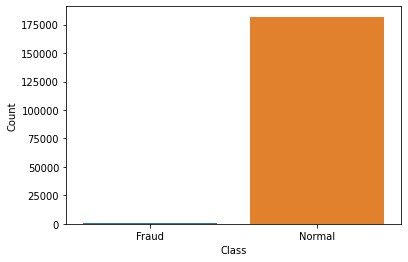

In [13]:
fraud_count=train_set[train_set['Class']==1]['Class'].count()
normal_count=train_set[train_set['Class']==0]['Class'].count()
print(fraud_count,normal_count)
sns.barplot(y=[fraud_count,normal_count],x=['Fraud','Normal'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
fraud_data=train_set[train_set['Class']==1]
normal_data=train_set[train_set['Class']==0]
print(fraud_data.shape,normal_data.shape)
print(normal_data.Amount[normal_data.Amount>10000])

(303, 31) (181974, 31)
284249    10199.44
151296    18910.00
Name: Amount, dtype: float64


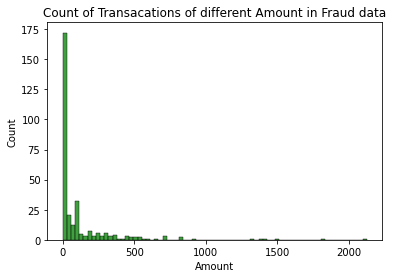

In [15]:
sns.histplot(data=fraud_data, x='Amount', color='green')
plt.title('Count of Transacations of different Amount in Fraud data')
plt.show()

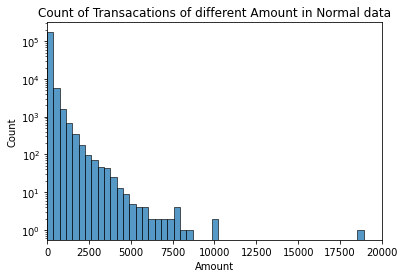

In [16]:
sns.histplot(data=normal_data, x='Amount', bins=50)
plt.title('Count of Transacations of different Amount in Normal data')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

## Classification:

1. Train a logistic regression model on the training set partition by taking all the features. Calculate the 
error on the validation set.

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
y_data=train_set['Class']
x_data=train_set.drop('Class',axis=1)
y_val_data=validation_set['Class']
x_val_data=validation_set.drop('Class',axis=1)
print(y_data.shape)
print(x_data.head())

(182277,)
            Time        V1        V2        V3        V4        V5        V6  \
96376    65743.0  1.302477 -0.866397  0.785250 -0.597110 -1.518418 -0.499402   
35345    38079.0 -1.031103  1.818406  0.136551  0.698094 -0.094033 -0.366810   
144723   86357.0 -0.701547  0.589280  1.361330  1.328064  0.575783 -0.709097   
222736  143097.0  1.827421 -0.998166 -0.843586  0.566805 -0.645491  0.136063   
35871    38302.0 -0.196442  0.184731  1.951985  2.008439 -0.044212  1.298077   

              V7        V8        V9  ...       V20       V21       V22  \
96376  -0.994682  0.001884 -0.275751  ... -0.422981 -0.228542 -0.283978   
35345   0.159960  0.693414 -0.883850  ... -0.026995  0.162482  0.384328   
144723  0.832339 -0.072985 -1.024328  ...  0.257787 -0.149696 -0.645738   
222736 -0.614340  0.103808 -0.483546  ... -0.469037 -0.207623 -0.321779   
35871  -0.426111  0.526389  0.336384  ...  0.149072 -0.255556 -0.299140   

             V23       V24       V25       V26       V27  

2. Train a neural network model (MLPClassifier) by taking all the features and predicting the result. Fix 
the random_state for training. Choose the solver as ‘adam’, and set the number of hidden layers to (10, 
2). Vary the hidden layers to find the best set of results on validation set. Explore different training 
parameters of MLP.

In [18]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=100,activation = 'relu',solver='adam',random_state=1)

X_train = train_set.iloc[:,0:-1].values
Y_train = train_set.iloc[:,-1].values
X_val = validation_set.iloc[:,0:-1].values
y_val = validation_set.iloc[:,-1].values

classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=100, random_state=1)

In [19]:
y_pred = classifier.predict(X_val)

3. Find the evaluation scores by constructing the confusion matrix (True Positive, False positive, True 
Negative and False Negatives). Precision = TP/(TP+FP), Recall = TP/(TP+FN)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,y_pred)
tn, fp, fn, tp = confusion_matrix(y_val,y_pred).ravel()
print(cm)

[[45482     3]
 [   65    19]]


In [21]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9985077574666988


In [22]:
def recall(confusion_matrix):
  return confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][1])
def precision(confusion_matrix):
  return confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])

rec=recall(cm)
pre=precision(cm)
print(rec)
print(pre)

0.9995824267598514
0.998572902715876


4. Plot the precision and recall values on the same plot for different training iterations for the MLP 
model by varying max_iter as 25, 50, 75, ….

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [32]:
values_recall=[]
values_precision=[]
val_iter=[]
values_recall_lib=[]
values_precision_lib=[]
for i in range(25,200,25):
  val_iter.append(i)
  classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=i,activation = 'relu',solver='adam',random_state=1)
  classifier.fit(X_train, Y_train)
  y_pred = classifier.predict(X_val)
  cm = confusion_matrix(y_val,y_pred)

  values_recall.append(recall(cm))
  values_precision.append(precision(cm))

print(values_recall)
print(values_precision)

C:\Users\agarw\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\agarw\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\agarw\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


[1.0, 1.0, 0.999055443282664, 0.9995824267598514, 0.9995824267598514, 0.9995824267598514, 0.9995824267598514]
[0.9981566415765103, 0.9981566415765103, 0.9990993365845086, 0.998572902715876, 0.998572902715876, 0.998572902715876, 0.998572902715876]


[1.0, 1.0, 0.999055443282664, 0.9995824267598514, 0.9995824267598514, 0.9995824267598514, 0.9995824267598514]
[0.9981566415765103, 0.9981566415765103, 0.9990993365845086, 0.998572902715876, 0.998572902715876, 0.998572902715876, 0.998572902715876]


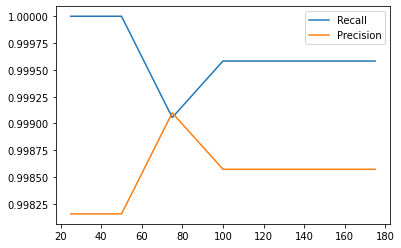

In [33]:
print(values_recall)
print(values_precision)

plt.plot(val_iter,values_recall)
plt.plot(val_iter,values_precision)

plt.legend(['Recall','Precision'])
plt.show()